# MOVIE RECOMMENDATION SYSTEM

## Overview

Developing a movie recommendation system to improve the user experience in the entertainment industry. By leveraging historical data , our project aims to enhance customer satisfaction by providing personalized movie suggestions, fostering engagement, and driving user retention

##  Business Understanding</small>

### Background
In this project, our objective is to develop a movie recommendation system utilizing the MovieLens dataset sourced from the GroupLens research lab at the University of Minnesota. This dataset contains user ratings for movies and is widely recognized in academic research and machine learning experiments.

### Business Problem
The primary goal is to enhance the user experience by providing personalized movie recommendations. The system will suggest the top 5 movies to each user based on their previous ratings. This tailored recommendation system aims to boost user engagement, satisfaction, and overall retention within a movie-streaming platform.

### User Interaction
Users will interact with the system through the movie-streaming platform, providing feedback through explicit ratings or indicating preferences through likes, dislikes, or their viewing history. The system's design should seamlessly integrate into the platform's user interface, ensuring a smooth and enjoyable user experience.

### Collaborative Filtering
The recommendation system will heavily rely on collaborative filtering as its primary mechanism. This technique involves making predictions about a user's preferences by aggregating insights from numerous users. Additionally, we may explore a hybrid approach, incorporating content-based filtering to tackle the cold start problem – a scenario where new or unrated movies necessitate recommendations.

### Content Based
Content-based filtering is a recommendation system technique that suggests items such as movies to users based on the characteristics of items and the preferences expressed by the user. The primary idea is to recommend items that are similar to those the user has liked or interacted with in the past.

### Evaluation Metrics
To gauge the effectiveness of our recommendation system, we will employ pertinent metrics. Traditional regression metrics like Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) will be utilized to quantify the accuracy of predictions. These metrics offer valuable insights into the system's proficiency in forecasting user preferences, guiding us in refining its performance.

**DATA UNDERSTANDING**

Dataset - * The dataset used for this project can be found in [Kaggle](https://grouplens.org/datasets/movielens/latest/)

tag.csv that contains tags applied to movies by users:
userId, movieId, tag, timestamp

rating.csv that contains ratings of movies by users:
userId, movieId, rating, timestamp

movie.csv that contains movie information:
movieId, title, genres

**PROBLEM STATEMENT**

With so many movie alternatives available nowadays, people find it difficult to choose films that suit their tastes due to information overload. Manual searches take a lot of time, which causes decision fatigue and lowers user engagement on a platform. A customized movie recommendation system that makes use of user-specific information and collaborative filtering methods will address this. By creating an effective recommendation engine that smoothly connects with user profiles, this project seeks to improve user satisfaction and retention by enabling a more efficient and enjoyable exploration of the extensive movie catalogs.

**OBJECTIVES**

Main objective:

* To provide personalized movie recommendations tailored to individual user preferences. 

Specific objectives:

* To find the most popular movies
* To build a content based recommendation system
* To build a collaborative filtering movie recommendations based on user interactions

##  Reading the data

In [166]:
# Importing the necessary libraries 
import pandas as pd
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")


import re
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import surprise


In [167]:
# Loading the datasets

tags_data = pd.read_csv("tags.csv")
movies_data = pd.read_csv("movies.csv")
ratings_data = pd.read_csv("ratings.csv")

# Preview the shape of the dataset
print('Dataframe shape {}'.format(tags_data.shape))
print('Dataframe shape {}'.format(movies_data.shape))
print('Dataframe shape {}'.format(ratings_data.shape))

Dataframe shape (3683, 4)
Dataframe shape (9742, 3)
Dataframe shape (100836, 4)


In [168]:
# Merge movies_data and tags_data on 'movieId'
merged_df = pd.merge(movies_data, tags_data, on='movieId', how='inner')

# Merge the result with ratings_data on 'movieId'
merged_df = pd.merge(merged_df, ratings_data, on='movieId', how='inner')

# Display the resulting DataFrame
merged_df.head()

,movieId,title,genres,userId_x,tag,timestamp_x,userId_y,rating,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,17,4.5,1305696483


In [169]:
merged_df.shape

(233213, 9)

In [170]:
#  Creating a class for exploring and analyzing Pandas DataFrames.
class DataExplorer:
    def __init__(self, data):
        """
        Initialize the DataExplorer class with a dataset.
        :param data: Pandas DataFrame
        """
        self.data = data
        
    def check_head(self, rows=5):
        """
        Display the first few rows of the dataset.
        :return: Pandas DataFrame showing the head of the dataset
        """
        return self.data.head(rows)
    
    def check_info(self):
        """
        Display information about the dataset (data types, memory usage, etc.).
        """
        return self.data.info()
    
    def check_describe(self):
        """
        Generate descriptive statistics of the dataset (count, mean, etc.).
        :return: Pandas DataFrame with descriptive statistics
        """
        return self.data.describe()
    

In [171]:
# Instatiating the class
explorer = DataExplorer(merged_df)

# Check the head of the dataset
print("Head of the dataset:")
print(explorer.check_head())

# Check dataset info
print("\nDataset info:")
explorer.check_info()

# Check dataset description
print("\nDataset statistics:")
print(explorer.check_describe())

Head of the dataset:
   movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
4        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

   userId_x    tag  timestamp_x  userId_y  rating  timestamp_y  
0       336  pixar   1139045764         1     4.0    964982703  
1       336  pixar   1139045764         5     4.0    847434962  
2       336  pixar   1139045764         7     4.5   1106635946  
3       336  pixar   1139045764        15     2.5   1510577970  
4       336  pixar   1139045764        17     4.5   1305696483  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233213 entries, 0 to 233212
Data columns (total 9 columns):
 

# Data Cleaning

This section prepares the data for EDA and modeling. The dataset will be checked for:

- duplicated rows
- missing values
- extracting release year from title

In [172]:
# Checking for missing values in the dataset
merged_df.isnull().sum()

movieId        0
title          0
genres         0
userId_x       0
tag            0
timestamp_x    0
userId_y       0
rating         0
timestamp_y    0
dtype: int64

The data has a no missing values.

In [173]:
merged_df.head()

,movieId,title,genres,userId_x,tag,timestamp_x,userId_y,rating,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,17,4.5,1305696483


In [174]:
# Function to extract the year from the title
def extract_year(title):
    match = re.search(r'\((\d{4})\)', title)
    return match.group(1) if match else None

# Apply the function to create a new 'year' column
merged_df['year'] = merged_df['title'].apply(extract_year)

# Remove the year from the 'title' column
merged_df['title'] = merged_df['title'].str.replace(r'\s*\(\d{4}\)', '', regex=True)

# Display the updated DataFram
merged_df.head()

,movieId,title,genres,userId_x,tag,timestamp_x,userId_y,rating,timestamp_y,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,1,4.0,964982703,1995
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,5,4.0,847434962,1995
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,7,4.5,1106635946,1995
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,15,2.5,1510577970,1995
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,17,4.5,1305696483,1995


In [175]:
# # Split the genres column into a list of genres
# merged_df['genres'] = merged_df['genres'].str.split('|')
merged_df = merged_df.explode('genres')

# Display the updated DataFrame
merged_df.head()

,movieId,title,genres,userId_x,tag,timestamp_x,userId_y,rating,timestamp_y,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,1,4.0,964982703,1995
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,5,4.0,847434962,1995
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,7,4.5,1106635946,1995
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,15,2.5,1510577970,1995
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,17,4.5,1305696483,1995


In [176]:
# Check for null values within the lists in the 'genres' column
null_values_in_genres = merged_df['genres'].apply(lambda x: any(pd.isnull(i) for i in x))

# Display the rows where null values are present in the 'genres' column
rows_with_null_values = merged_df[null_values_in_genres]
print("Rows with null values in the 'genres' column:")
print(rows_with_null_values)

Rows with null values in the 'genres' column:
Empty DataFrame
Columns: [movieId, title, genres, userId_x, tag, timestamp_x, userId_y, rating, timestamp_y, year]
Index: []


The genre column has no missing values

In [177]:
# Converting year to date-time format
merged_df['year'] = pd.to_datetime(merged_df['year'])
# Keeping the year only
merged_df['year'] = merged_df['year'].dt.year
# previewing the changes
merged_df.head()

,movieId,title,genres,userId_x,tag,timestamp_x,userId_y,rating,timestamp_y,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,1,4.0,964982703,1995.0
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,5,4.0,847434962,1995.0
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,7,4.5,1106635946,1995.0
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,15,2.5,1510577970,1995.0
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764,17,4.5,1305696483,1995.0


# Explarotary Data Analysis

### Univariate Analysis

In [178]:
# checking summary stats for the dataset
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
movieId,233213.0,1.232000e+04,2.824392e+04,1.000000e+00,2.960000e+02,1.198000e+03,4.638000e+03,1.935650e+05
userId_x,233213.0,4.706836e+02,1.533296e+02,2.000000e+00,4.240000e+02,4.770000e+02,5.990000e+02,6.100000e+02
timestamp_x,233213.0,1.384774e+09,1.534621e+08,1.137179e+09,1.242494e+09,1.457901e+09,1.498457e+09,1.537099e+09
userId_y,233213.0,3.096882e+02,1.782064e+02,1.000000e+00,1.560000e+02,3.090000e+02,4.600000e+02,6.100000e+02
rating,233213.0,3.966535e+00,9.686373e-01,5.000000e-01,3.500000e+00,4.000000e+00,5.000000e+00,5.000000e+00
timestamp_y,233213.0,1.213524e+09,2.250448e+08,8.281246e+08,1.017365e+09,1.217325e+09,1.443201e+09,1.537799e+09
year,233210.0,1.994435e+03,1.171456e+01,1.921000e+03,1.994000e+03,1.994000e+03,2.000000e+03,2.018000e+03


In [179]:
# checking values in tag column
merged_df['tag'].value_counts()

tag
sci-fi               2527
thought-provoking    2487
twist ending         2434
atmospheric          2227
dark comedy          2056
                     ... 
Cole Porter             1
deafness                1
convent                 1
Anne Boleyn             1
remaster                1
Name: count, Length: 1584, dtype: int64

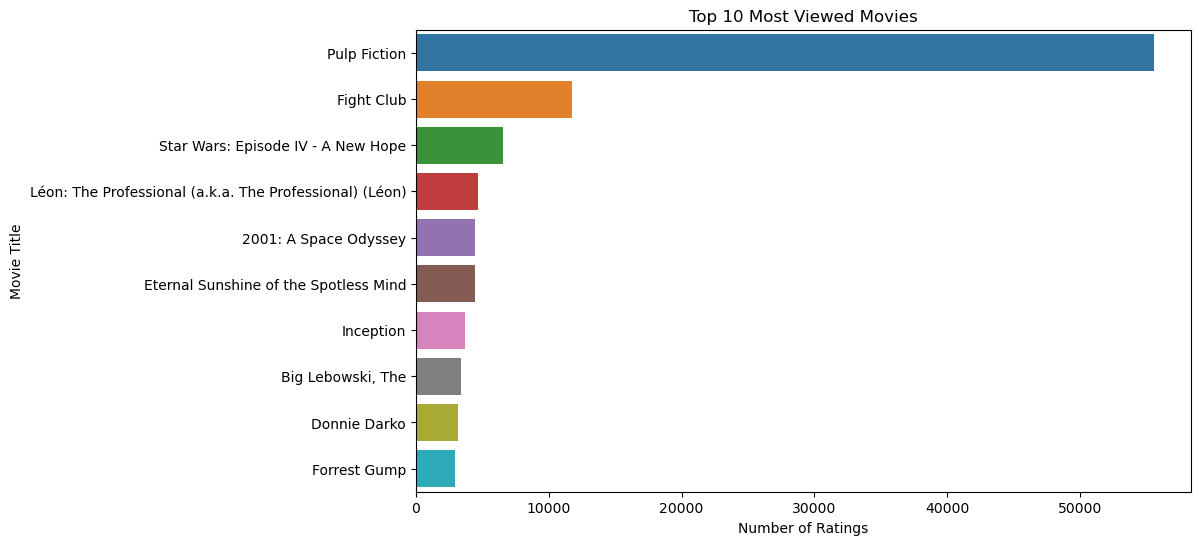

In [180]:
# Count the number of ratings for each movie
movie_ratings = merged_df['title'].value_counts().head(10)

# Plotting the top 10 most viewed movies
plt.figure(figsize=(10, 6))
sns.barplot(x=movie_ratings.values, y=movie_ratings.index)
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.title('Top 10 Most Viewed Movies')
plt.show()


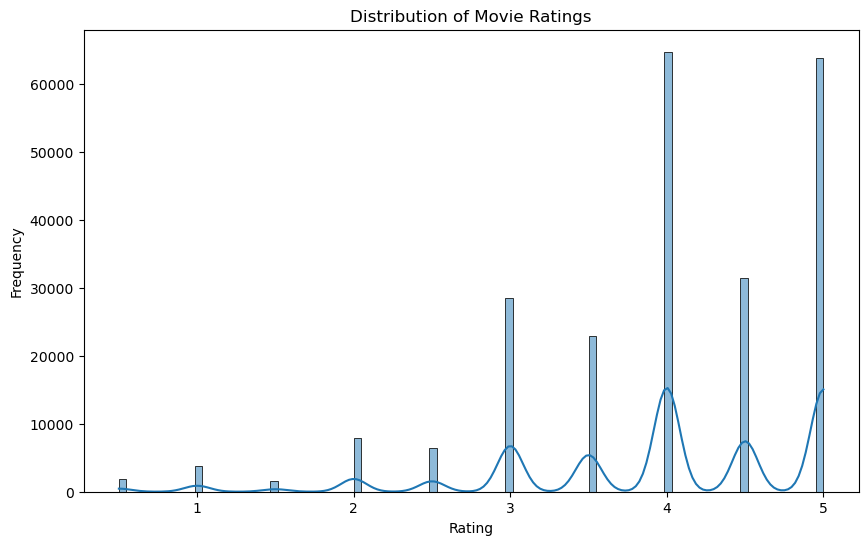

In [181]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['rating'], kde=True)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Ratings')
plt.show()

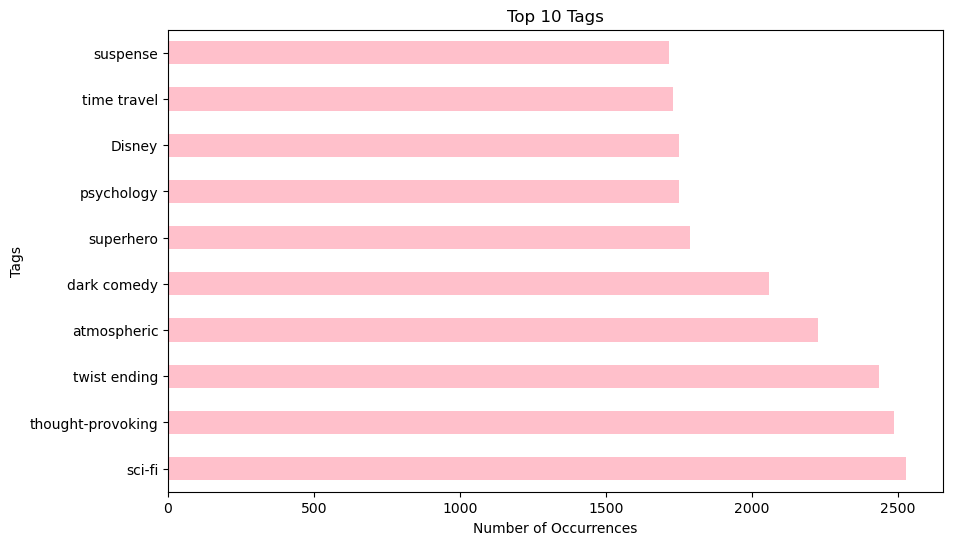

In [182]:
# Plot a bar chart for the top tags
tag_counts = merged_df['tag'].value_counts()
top_tags = tag_counts.head(10)

plt.figure(figsize=(10, 6))
top_tags.plot(kind='barh', color='pink')
plt.title('Top 10 Tags')
plt.xlabel('Number of Occurrences')
plt.ylabel('Tags')
plt.show()

In [183]:
def find_genres(movies_df):
    """
    Find and count genres in a movies DataFrame.

    """
    genres = {}  # dictionary to store different genre values

    for genre in movies_df['genres']:
        words = genre.split('|')
        for word in words:
            genres[word] = genres.get(word, 0) + 1

    return genres

# usage:
genre_counts = find_genres(movies_data)
genre_counts

{'Adventure': 1263,
 'Animation': 611,
 'Children': 664,
 'Comedy': 3756,
 'Fantasy': 779,
 'Romance': 1596,
 'Drama': 4361,
 'Action': 1828,
 'Crime': 1199,
 'Thriller': 1894,
 'Horror': 978,
 'Mystery': 573,
 'Sci-Fi': 980,
 'War': 382,
 'Musical': 334,
 'Documentary': 440,
 'IMAX': 158,
 'Western': 167,
 'Film-Noir': 87,
 '(no genres listed)': 34}

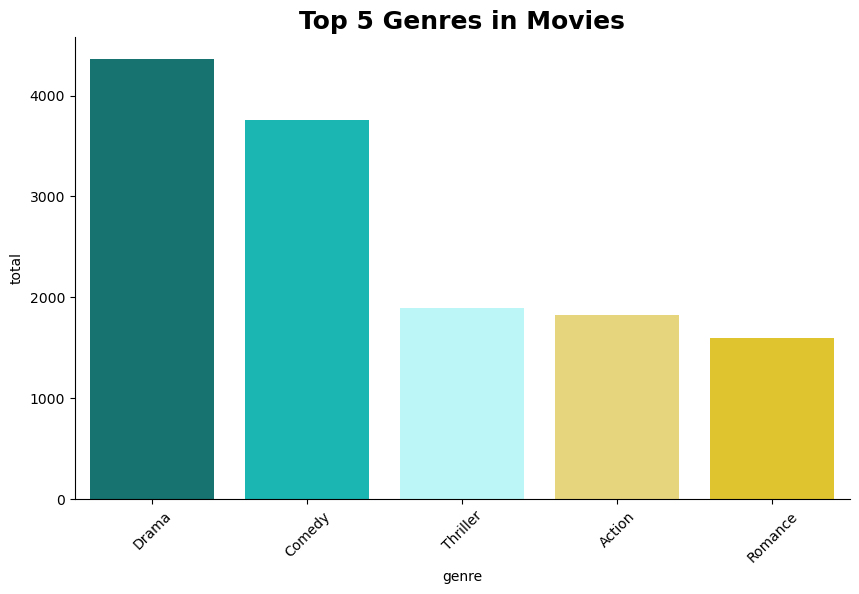

In [184]:
# Create a DataFrame from the genre_counts dictionary
df_plot = pd.DataFrame.from_dict(genre_counts, orient='index', columns=['total']).reset_index()
df_plot = df_plot.rename(columns={'index': 'genre'})

# Sort the DataFrame by 'total' in descending order
df_plot = df_plot.sort_values(by='total', ascending=False)

# Set the number of top genres to display
top_n_genres = 5

# Create the bar plot for the top 5 genres
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_plot.head(top_n_genres), x='genre', y='total', palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])
ax.set_title('Top 5 Genres in Movies', fontsize=18, weight='bold')
sns.despine()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()

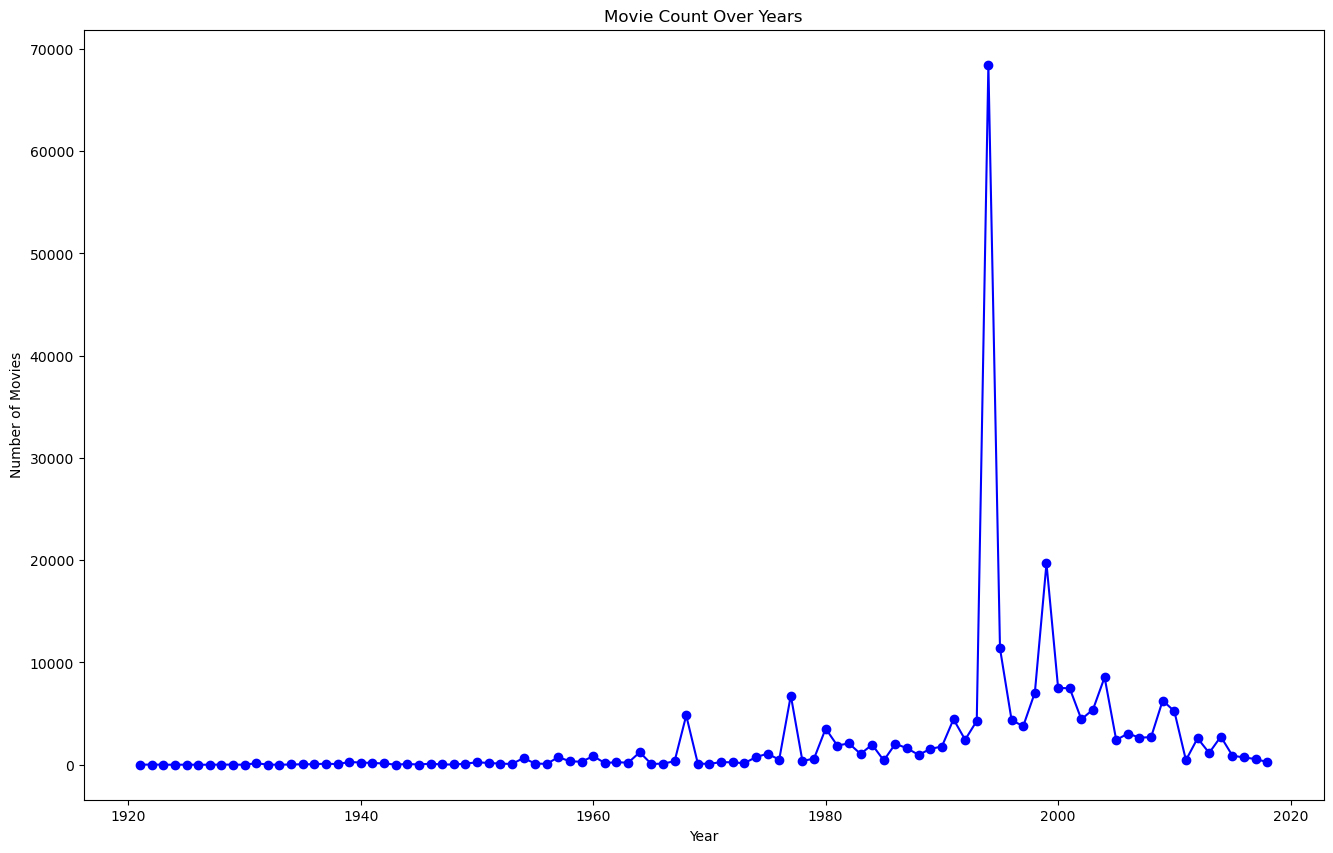

In [185]:
# Plot a line chart for movie count over the years
movie_count_per_year = merged_df['year'].value_counts().sort_index()

plt.figure(figsize=(16, 10))
movie_count_per_year.plot(kind='line', marker='o', color='blue')
plt.title('Movie Count Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

# Bivariate Analysis

### Popular movies of all time (based on highly rated and high number of ratings)

In [186]:
merged_data = pd.merge(ratings_data, movies_data, on='movieId', how='left')

In [187]:
# Count how many people rated each movie
movie_ratings_count = merged_data.groupby('title')['userId'].count().reset_index(name='num_ratings')
# Only keep movies that got at least a hundred ratings
popular_movies = movie_ratings_count[movie_ratings_count['num_ratings'] >= 100]
popular_movies

,title,num_ratings
74,2001: A Space Odyssey (1968),109
207,Ace Ventura: Pet Detective (1994),161
298,Aladdin (1992),183
327,Alien (1979),146
333,Aliens (1986),126
...,...,...
9120,V for Vendetta (2006),100
9215,WALL·E (2008),104
9298,Waterworld (1995),115
9485,Willy Wonka & the Chocolate Factory (1971),119


In [188]:
# Combine the original data with only the popular movies
filtered_data = pd.merge(merged_data, popular_movies, on='title', how='inner')
# Find the average rating for each movie
average_ratings = filtered_data.groupby('title')['rating'].mean().reset_index()

In [189]:
# Add the average rating column to the popular_movies DataFrame
popular_movies = pd.merge(popular_movies, average_ratings, on='title', how='left')
popular_movies

,title,num_ratings,rating
0,2001: A Space Odyssey (1968),109,3.894495
1,Ace Ventura: Pet Detective (1994),161,3.040373
2,Aladdin (1992),183,3.792350
3,Alien (1979),146,3.969178
4,Aliens (1986),126,3.964286
...,...,...,...
133,V for Vendetta (2006),100,3.885000
134,WALL·E (2008),104,4.057692
135,Waterworld (1995),115,2.913043
136,Willy Wonka & the Chocolate Factory (1971),119,3.873950


In [190]:
# Create a special combined score by considering both the average rating and the number of ratings
filtered_data['combined_metric'] = filtered_data['rating'] * (filtered_data['num_ratings'].apply(lambda x: min(1, x / 100)))

In [191]:
# Sort the movies based on the combined score from highest to lowest
sorted_movies = filtered_data.groupby('title')['combined_metric'].sum().reset_index()
sorted_movies = sorted_movies.sort_values(by='combined_metric', ascending=False)
sorted_movies

,title,combined_metric
106,"Shawshank Redemption, The (1994)",1404.0
50,Forrest Gump (1994),1370.0
99,Pulp Fiction (1994),1288.5
84,"Matrix, The (1999)",1165.5
109,"Silence of the Lambs, The (1991)",1161.0
...,...,...
95,Outbreak (1995),346.0
32,Clueless (1995),342.5
92,"Net, The (1995)",340.5
135,Waterworld (1995),335.0


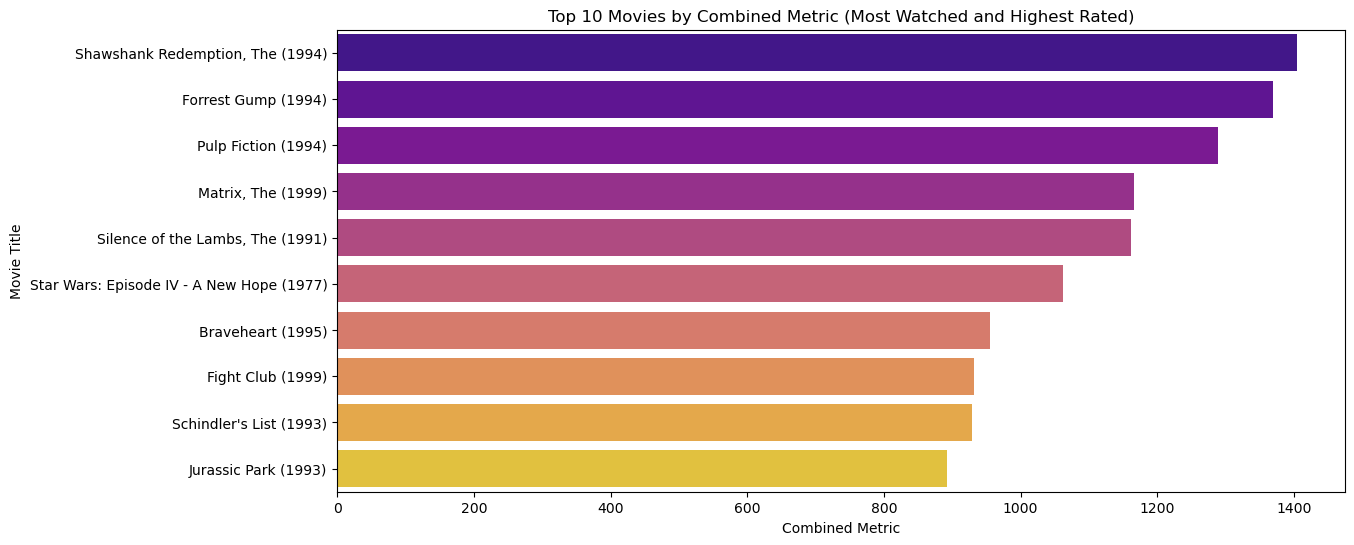

In [192]:
#Cool bar plot to show the top 10 movies with the best combined score
plt.figure(figsize=(13, 6))
sns.barplot(x="combined_metric", y="title", data=sorted_movies.head(10), palette="plasma")
plt.title("Top 10 Movies by Combined Metric (Most Watched and Highest Rated)")
plt.xlabel("Combined Metric")
plt.ylabel("Movie Title")
plt.show()

In [193]:
merged_data.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres'], dtype='object')

In [194]:
#Analysis of rating given by the user 
no_of_rated_movies_per_user = merged_df.groupby(by='userId_y')['rating'].count().sort_values(ascending=False)
no_of_rated_movies_per_user

userId_y
474    2455
414    2343
599    2100
68     1791
610    1701
       ... 
406      10
499       9
207       8
578       6
175       5
Name: rating, Length: 610, dtype: int64

In [195]:
no_of_rated_movies_per_user.describe()

count     610.000000
mean      382.316393
std       365.395411
min         5.000000
25%       106.500000
50%       280.000000
75%       525.000000
max      2455.000000
Name: rating, dtype: float64

### Most popular movies by genre

In [196]:
# Merge datasets based on movieId
movie_ratings = pd.merge(ratings_data, movies_data, on='movieId')
# Count how many ratings each movie has
ratings_count = movie_ratings.groupby('title')['userId'].count().reset_index(name='num_ratings')
# Filter movies with more than 100 ratings
popular_movies = ratings_count[ratings_count['num_ratings'] > 100]
# Select movies with over 100 ratings from the merged DataFrame
movie_ratings_with_100_ratings = movie_ratings[movie_ratings['title'].isin(popular_movies['title'])]
# Function to get the most popular movies by genre
def get_most_popular_by_genre(genre, top_n=5):
    # Filter movies with over 100 ratings by genre
    genre_movies = movie_ratings_with_100_ratings[movie_ratings_with_100_ratings['genres'].str.contains(genre, case=False)]
    # Calculate average ratings and number of ratings for each movie
    genre_movie_stats = genre_movies.groupby('title').agg({'rating': ['mean', 'count']})

    # Rename columns for clarity
    genre_movie_stats.columns = ['avg_rating', 'num_ratings']

    # Sort by average rating and number of ratings
    sorted_genre_movies = genre_movie_stats.sort_values(by=['avg_rating', 'num_ratings'], ascending=[False, False])

    # Select the top N movies
    top_movies = sorted_genre_movies.head(top_n)

    return top_movies

In [197]:
# Ask the user for input
genre_input = input("Enter the genre you're interested in: ")

# Get the top movies based on user input
top_genre_movies = get_most_popular_by_genre(genre_input)

# Display the result if it's not None
if top_genre_movies is not None:
    print(f"Most porpular {genre_input} Movies:")
    print(top_genre_movies)

Most porpular Adventure Movies:
                                                    avg_rating  num_ratings
title                                                                      
Princess Bride, The (1987)                            4.232394          142
Star Wars: Episode IV - A New Hope (1977)             4.231076          251
Star Wars: Episode V - The Empire Strikes Back ...    4.215640          211
Raiders of the Lost Ark (Indiana Jones and the ...    4.207500          200
Monty Python and the Holy Grail (1975)                4.161765          136


## Recommendation systems

### Building Recommendation System (Collaborative Filtering using Surprise library)

In [198]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import train_test_split, cross_validate
from surprise import accuracy  


# Load data for Surprise library
reader = Reader()
data = Dataset.load_from_df(ratings_data[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Use SVD algorithm and perform cross-validation on the training set
svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Train the model on the entire training set
trainset = data.build_full_trainset()
svd.fit(trainset)

# Evaluate the model on the testing set
test_predictions = svd.test(testset)
test_rmse = accuracy.rmse(test_predictions)
test_mae = accuracy.mae(test_predictions)
print(f"Test RMSE: {test_rmse:.4f}, Test MAE: {test_mae:.4f}")

# Make recommendations for a specific user
user_id = 7
user_movies = ratings_data[ratings_data['userId'] == user_id]['movieId']
unrated_movies = movies_data[~movies_data['movieId'].isin(user_movies)]['movieId']

# Generate predictions for unrated movies
user_predictions = [(movie, svd.predict(user_id, movie).est) for movie in unrated_movies]

# Sort predictions by estimated rating
sorted_predictions = sorted(user_predictions, key=lambda x: x[1], reverse=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8659  0.8847  0.8789  0.8715  0.8665  0.8735  0.0073  
MAE (testset)     0.6662  0.6780  0.6754  0.6704  0.6655  0.6711  0.0050  
Fit time          1.09    0.98    0.94    1.21    1.02    1.05    0.10    
Test time         0.09    0.09    0.65    0.11    0.10    0.21    0.22    
RMSE: 0.6456
MAE:  0.5006
Test RMSE: 0.6456, Test MAE: 0.5006


In [199]:
# Display top 5 movie recommendations
top_recommendations = sorted_predictions[:5]
print("\nTop 5 Movie Recommendations:")
for movie_id, estimated_rating in top_recommendations:
    movie_title = movies_data[movies_data['movieId'] == movie_id]['title'].values[0]
    print(f"Movie: {movie_title}, Estimated Rating: {estimated_rating}")


Top 5 Movie Recommendations:
Movie: Godfather, The (1972), Estimated Rating: 4.360699943686293
Movie: 12 Angry Men (1957), Estimated Rating: 4.360399725537607
Movie: Great Escape, The (1963), Estimated Rating: 4.338280690145056
Movie: Princess Bride, The (1987), Estimated Rating: 4.324028375425897
Movie: Lawrence of Arabia (1962), Estimated Rating: 4.299031036977162


**CONTENT BASED**

In [200]:
def genres_and_titles_to_string(row):
    genres = row['genres'].split('|')
    genres = ' '.join(''.join(j) for j in genres)
    
    title = row['title']
    
    return "%s %s" % (genres, title)

In [201]:
movies_data['string'] = movies_data.apply(genres_and_titles_to_string, axis = 1)

In [202]:
#create a tf-idf vectorizer object
tfidf = TfidfVectorizer(max_features = 200)

In [203]:
#create the TF-IDF matrix
X = tfidf.fit_transform(movies_data['string'])
X.shape

(9742, 200)

In [204]:
movie2idx = pd.Series(movies_data.index, index = movies_data['title'])

### Content-Based Filtering by Title

In [205]:
def recommend(movie, K):
    #get the row in the df for this movie
    idx = movie2idx[movie]
    if type(idx) == pd.Series:
        idx = idx.iloc[0]
        
    #calculate the pairwise similarities for this movie:
    movie_index = X[idx]
    scores = cosine_similarity(movie_index, X)
    
    #currently the array is 1xN, make it 1D array
    scores = scores.flatten()
    
    #get the indices of the highest scoring movies
    recommended_idx = (-scores).argsort()[1:K+1]
    
    #return the titles of the recommendations
    return movies_data['title'].iloc[recommended_idx]

In [206]:
recommend('Toy Story (1995)',7)

2355                        Toy Story 2 (1999)
12                                Balto (1995)
1                               Jumanji (1995)
7355                        Toy Story 3 (2010)
599     Wallace & Gromit: A Close Shave (1995)
209                               Gordy (1995)
4604      Ninja Scroll (Jûbei ninpûchô) (1995)
Name: title, dtype: object

### Content-Based Filtering by Genre

In [207]:
movie3idx = pd.Series(movies_data.index, index = movies_data['genres'])
movie3idx
def recommend_g(movie, K):
    #get the row in the df for this movie
    idx = movie3idx[movie]
    if type(idx) == pd.Series:
        idx = idx.iloc[0]
        
    #calculate the pairwise similarities for this movie:
    movie_index = X[idx]
    scores = cosine_similarity(movie_index, X)
    
    #currently the array is 1xN, make it 1D array
    scores = scores.flatten()
    
    #get the indices of the highest scoring movies
    recommended_idx = (-scores).argsort()[1:K+1]
    
    #return the titles of the recommendations
    return movies_data['title'].iloc[recommended_idx]

In [208]:
recommend_g('Horror',7)

188                                  Castle Freak (1995)
571                                Delta of Venus (1995)
675    Halloween: The Curse of Michael Myers (Hallowe...
290                         Village of the Damned (1995)
125                                Addiction, The (1995)
352                       In the Mouth of Madness (1995)
189                             Circle of Friends (1995)
Name: title, dtype: object

### Attempt at Hybrid Reccomendation System

In [209]:
# Collaborative Filtering
def collaborative_filtering(user_id, movie_id):
    reader = Reader()
    data = Dataset.load_from_df(ratings_data[['userId', 'movieId', 'rating']], reader)
    trainset = data.build_full_trainset()
    
    svd = SVD()
    svd.fit(trainset)
    
    prediction = svd.predict(user_id, movie_id)
    return prediction.est

# Content-Based Filtering
def content_based_filtering(movie, K):
    tfidf = TfidfVectorizer(max_features=200)
    X = tfidf.fit_transform(movies_data['string'])
    
    idx = movie2idx[movie]
    if type(idx) == pd.Series:
        idx = idx.iloc[0]

    movie_index = X[idx]
    scores = cosine_similarity(movie_index, X)
    scores = scores.flatten()
    
    recommended_idx = (-scores).argsort()[1:K+1]
    
    return movies_data['title'].iloc[recommended_idx]

# Hybrid Recommendation System
def hybrid_recommendation(user_id, input_title_or_genre, K=5, collaborative_weight=0.5):
    if input_title_or_genre in movies_data['title'].values:
        movie_id = movie2idx[input_title_or_genre]
        collaborative_score = collaborative_filtering(user_id, movie_id)
        content_based_movies = content_based_filtering(input_title_or_genre, K)
    elif input_title_or_genre in movies_data['genres'].str.split('|').sum():
        # If input is a genre
        content_based_movies = content_based_filtering(input_title_or_genre, K)
        collaborative_score = 0  # No collaborative filtering for genres
    else:
        print("Invalid input. Please enter a valid movie title or genre.")
        return

    # Combine scores
    hybrid_scores = (collaborative_weight * collaborative_score) + ((1 - collaborative_weight) * content_based_movies.index)
    
    # Get the top K movies based on hybrid scores
    top_hybrid_movies = movies_data['title'].iloc[hybrid_scores.argsort()[::-1][:K]]
    
    return top_hybrid_movies



In [210]:
# Testing recommending movies based on user input
user_id = 1
user_input = input("Enter a movie title or genre: ")
recommended_movies = hybrid_recommendation(user_id, user_input)
print(f"Top 5 Hybrid Recommendations:")
print(recommended_movies)

Top 5 Hybrid Recommendations:
3              Waiting to Exhale (1995)
0                      Toy Story (1995)
4    Father of the Bride Part II (1995)
1                        Jumanji (1995)
2               Grumpier Old Men (1995)
Name: title, dtype: object


In [211]:
#import pickle

# Save the trained SVD model to a file
#model_filename = 'svd_model.pkl'
#with open(model_filename, 'wb') as file:
#    pickle.dump(svd, file)
# Load the saved SVD model from a file
#with open(model_filename, 'rb') as file:
#    loaded_svd = pickle.load(file)